In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
dataFrame = pd.read_csv("Data/BCH_USD2.csv")

In [3]:
dataFrame['y'] = dataFrame['y'] #np.log()
dataFrame.head()

,ds,y
0,2017-08-02 00:00:00 UTC,767.767713
1,2017-08-03 00:00:00 UTC,398.843862
2,2017-08-04 00:00:00 UTC,234.618922
3,2017-08-05 00:00:00 UTC,206.843373
4,2017-08-06 00:00:00 UTC,216.019330


In [4]:
model = Prophet()
model.fit(dataFrame)

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [6]:
future = model.make_future_dataframe(periods=10)
future.tail()

,ds
148,2017-12-28
149,2017-12-29
150,2017-12-30
151,2017-12-31
152,2018-01-01


In [9]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
148,2017-12-28,2472.905902,2160.870997,2804.290699
149,2017-12-29,2545.657072,2209.171944,2859.824437
150,2017-12-30,2526.704654,2215.749763,2863.337521
151,2017-12-31,2561.768367,2242.467456,2876.040582
152,2018-01-01,2590.094265,2263.052422,2896.380035


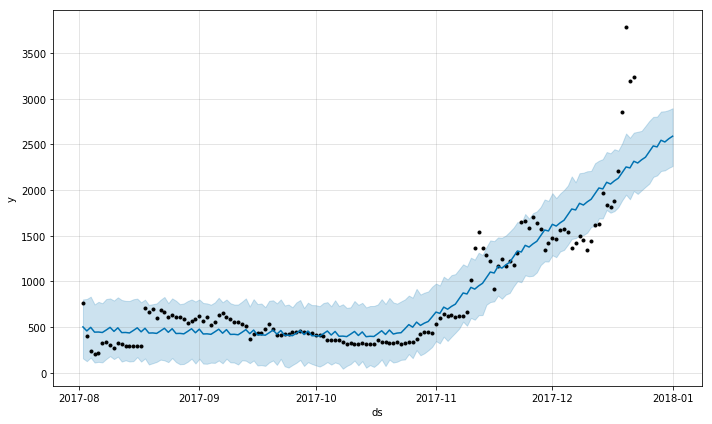

In [10]:
model.plot(forecast)

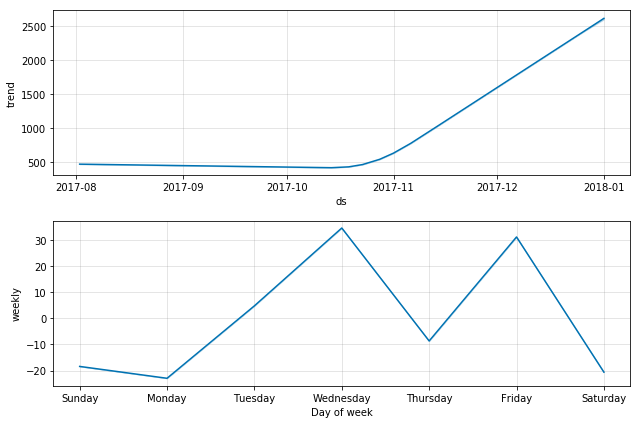

In [11]:
model.plot_components(forecast)